In [1]:
import numpy as np
import pandas as pd

In [51]:
data = pd.read_csv('the_last_of_us_survival_dataset.csv')

df = pd.DataFrame(data)
df.head()

,Edad,Genero,Faccion,ExperienciaCombate,HabilidadSigilo,Salud,ArmaFuego,ArmaCuerpoCuerpo,ItemCreable,NivelInfeccionZona,CondicionesClimaticas,NivelEstrés,TieneCompañero,Superviviente
0,58,Masculino,Militar,9,3,74,Bow,Lead Pipe,Health Kit,4,Seco,5,0,1
1,16,Femenino,Civil,9,2,82,El Diablo,Ninguna,Molotov Cocktail,10,Lluvioso,8,0,0
2,33,Femenino,Civil,4,5,66,Shorty,Ninguna,Health Kit,4,Lluvioso,10,0,0
3,33,Femenino,Civil,3,6,98,Shotgun,Lead Pipe,Health Kit,8,Seco,1,1,0
4,57,Masculino,Militar,2,5,52,Revolver,Hatchet,Shiv,10,Seco,0,0,0


## Converting Spanish col names to Eng

In [52]:
# Renaming Spanish cols to English

mapping = {
    "Edad": "Age",
    "Genero": "Gender",
    "Faccion": "Faction",
    "ExperienciaCombate": "CombatExp",
    "HabilidadSigilo":"StealthSkill",
    "Salud":"Health",
    "ArmaFuego":"Firearm",
    "ArmaCuerpoCuerpo":"MeleeWeapon",
    "ItemCreable":"CraftableItem",
    "NivelInfeccionZona":"ZoneInfectionLevel",
    "CondicionesClimaticas":"WeatherConditions",
    "NivelEstrés":"StressLevel",
    "TieneCompañero":"HasCompanion",
    "Superviviente":"Survived"
   
}

df = df.rename(columns=mapping)
df.head()

,Age,Gender,Faction,CombatExp,StealthSkill,Health,Firearm,MeleeWeapon,CraftableItem,ZoneInfectionLevel,WeatherConditions,StressLevel,HasCompanion,Survived
0,58,Masculino,Militar,9,3,74,Bow,Lead Pipe,Health Kit,4,Seco,5,0,1
1,16,Femenino,Civil,9,2,82,El Diablo,Ninguna,Molotov Cocktail,10,Lluvioso,8,0,0
2,33,Femenino,Civil,4,5,66,Shorty,Ninguna,Health Kit,4,Lluvioso,10,0,0
3,33,Femenino,Civil,3,6,98,Shotgun,Lead Pipe,Health Kit,8,Seco,1,1,0
4,57,Masculino,Militar,2,5,52,Revolver,Hatchet,Shiv,10,Seco,0,0,0


In [11]:
df.isna().sum()

Age                   0
Gender                0
Faction               0
CombatExp             0
StealthSkill          0
Health                0
Firearm               0
MeleeWeapon           0
CraftableItem         0
ZoneInfectionLevel    0
WeatherConditions     0
StressLevel           0
HasCompanion          0
Survived              0
dtype: int64

## EDA

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

### Distribution

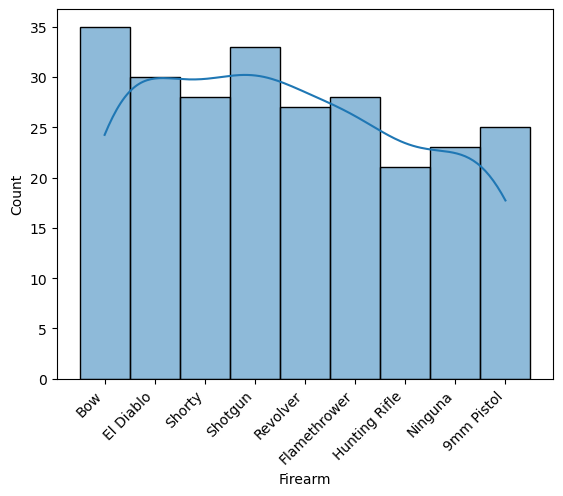

In [9]:
sns.histplot(data=df, x='Firearm' , kde=True)
plt.xticks(rotation=45,ha='right')
plt.show()

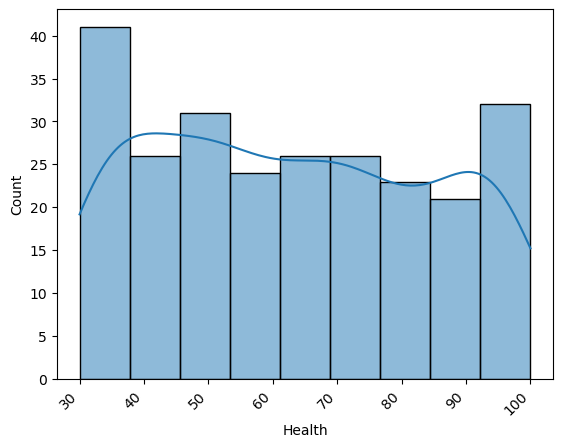

In [10]:
sns.histplot(data=df, x='Health' , kde=True)
plt.xticks(rotation=45,ha='right')
plt.show()

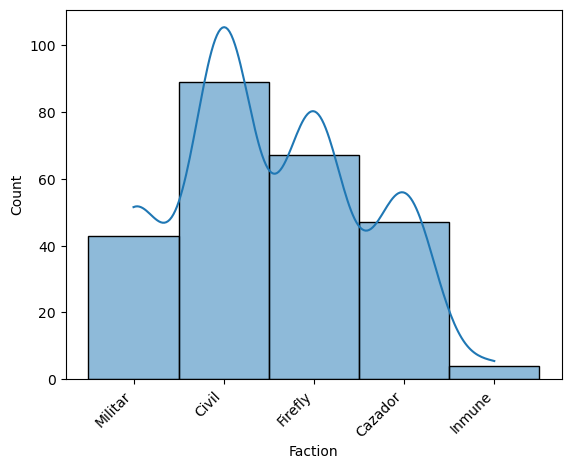

In [12]:
sns.histplot(data=df, x='Faction' , kde=True)
plt.xticks(rotation=45,ha='right')
plt.show()

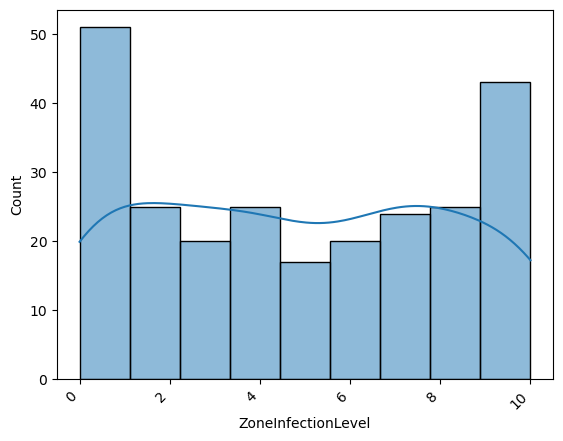

In [14]:
sns.histplot(data=df, x='ZoneInfectionLevel' , kde=True)
plt.xticks(rotation=45,ha='right')
plt.show()

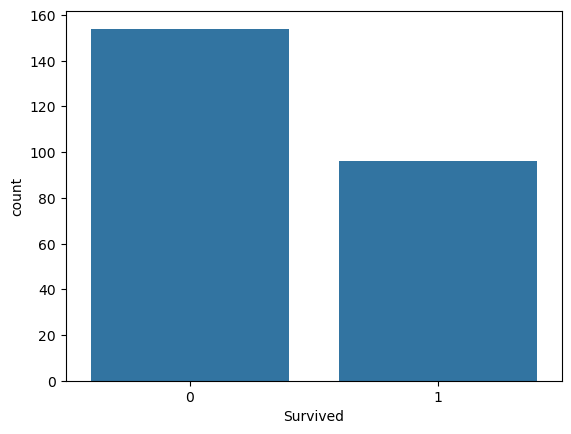

In [19]:
sns.countplot(data=df, x='Survived')

plt.show()

In [20]:
df.head()

,Age,Gender,Faction,CombatExp,StealthSkill,Health,Firearm,MeleeWeapon,CraftableItem,ZoneInfectionLevel,WeatherConditions,StressLevel,HasCompanion,Survived
0,58,Masculino,Militar,9,3,74,Bow,Lead Pipe,Health Kit,4,Seco,5,0,1
1,16,Femenino,Civil,9,2,82,El Diablo,Ninguna,Molotov Cocktail,10,Lluvioso,8,0,0
2,33,Femenino,Civil,4,5,66,Shorty,Ninguna,Health Kit,4,Lluvioso,10,0,0
3,33,Femenino,Civil,3,6,98,Shotgun,Lead Pipe,Health Kit,8,Seco,1,1,0
4,57,Masculino,Militar,2,5,52,Revolver,Hatchet,Shiv,10,Seco,0,0,0


<Axes: xlabel='HasCompanion', ylabel='count'>

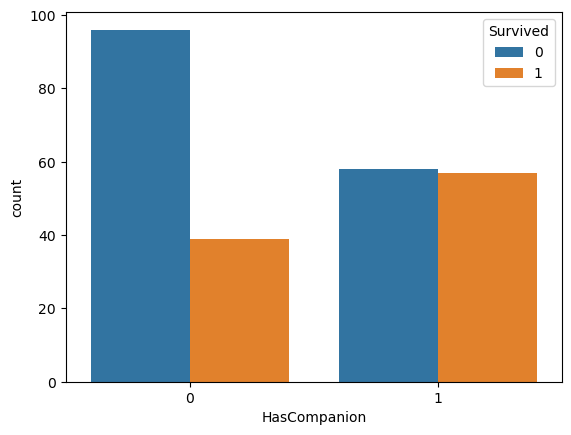

In [29]:
sns.countplot(data=df, hue='Survived', x='HasCompanion')

<Axes: xlabel='CombatExp', ylabel='count'>

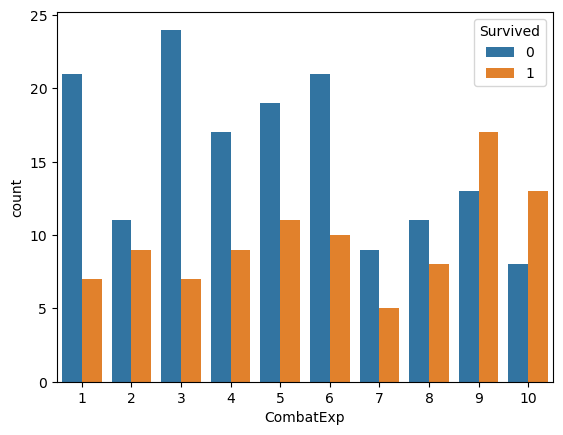

In [30]:
sns.countplot(data=df, hue='Survived', x='CombatExp')

<Axes: xlabel='Faction', ylabel='Survived'>

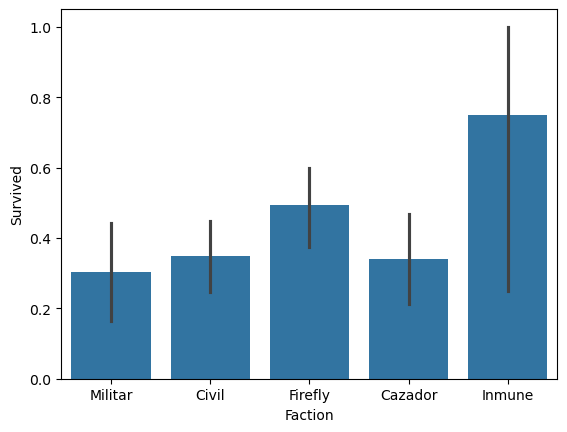

In [34]:
sns.barplot(data=df, y='Survived', x='Faction')

## Feature Selection by EDA

#### Comparing Numeric Features with Target - 'Survived'

In [36]:
corr = df.corr(numeric_only=True)
corr

,Age,CombatExp,StealthSkill,Health,ZoneInfectionLevel,StressLevel,HasCompanion,Survived
Age,1.000000,0.104251,-0.055681,-0.013076,-0.038539,-0.047418,0.027666,0.016394
CombatExp,0.104251,1.000000,-0.079805,0.097465,-0.081550,0.060570,-0.003562,0.196701
StealthSkill,-0.055681,-0.079805,1.000000,-0.074818,-0.105479,0.102912,-0.053542,0.161142
Health,-0.013076,0.097465,-0.074818,1.000000,-0.039342,0.031376,0.033383,0.227203
ZoneInfectionLevel,-0.038539,-0.081550,-0.105479,-0.039342,1.000000,0.020734,-0.070716,-0.730012
StressLevel,-0.047418,0.060570,0.102912,0.031376,0.020734,1.000000,-0.002294,-0.103341
HasCompanion,0.027666,-0.003562,-0.053542,0.033383,-0.070716,-0.002294,1.000000,0.211882
Survived,0.016394,0.196701,0.161142,0.227203,-0.730012,-0.103341,0.211882,1.000000


<Axes: >

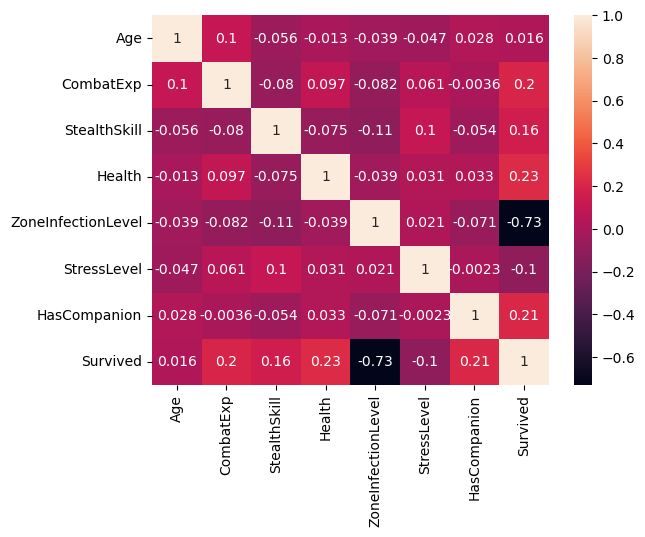

In [37]:
sns.heatmap(data= corr, annot=True)

through the heatmap , we get to know Age is irrelevant to survival probability

### Comparing Categorical Features with Target 

<Axes: xlabel='Gender', ylabel='count'>

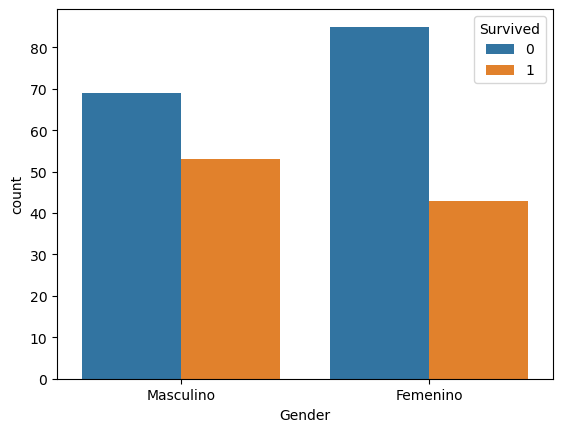

In [42]:
sns.countplot(data=df, x='Gender',hue='Survived')

<Axes: xlabel='Faction', ylabel='count'>

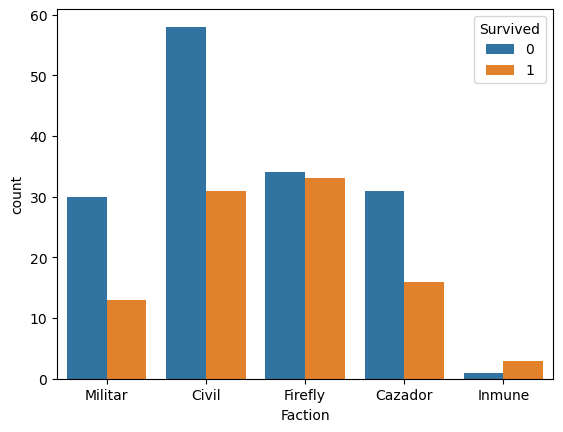

In [43]:
sns.countplot(data=df, x='Faction',hue='Survived')

<Axes: xlabel='Firearm', ylabel='count'>

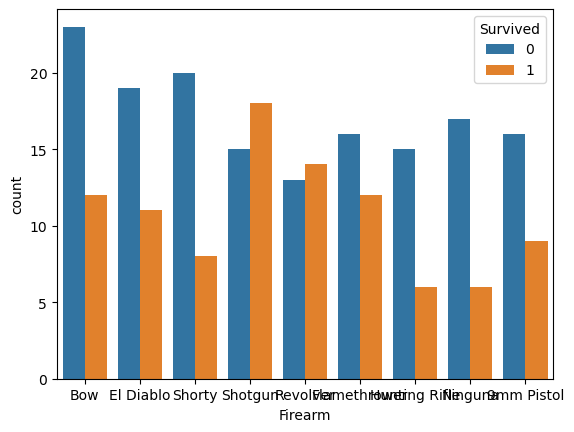

In [44]:
sns.countplot(data=df, x='Firearm',hue='Survived')

<Axes: xlabel='MeleeWeapon', ylabel='count'>

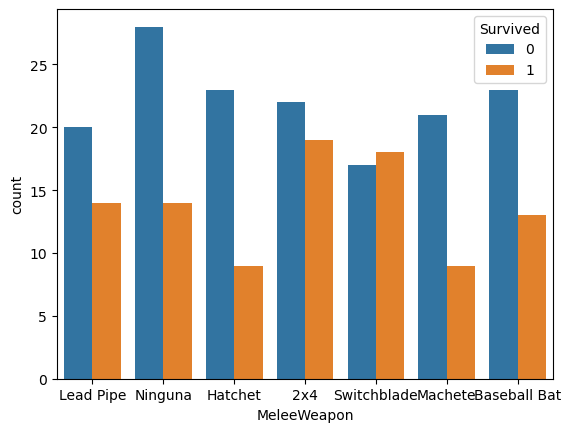

In [45]:
sns.countplot(data=df, x='MeleeWeapon',hue='Survived')

<Axes: xlabel='CraftableItem', ylabel='count'>

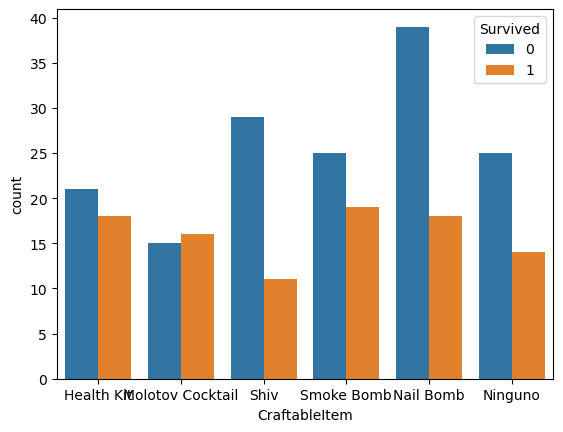

In [47]:
sns.countplot(data=df, x='CraftableItem',hue='Survived')

<Axes: xlabel='WeatherConditions', ylabel='count'>

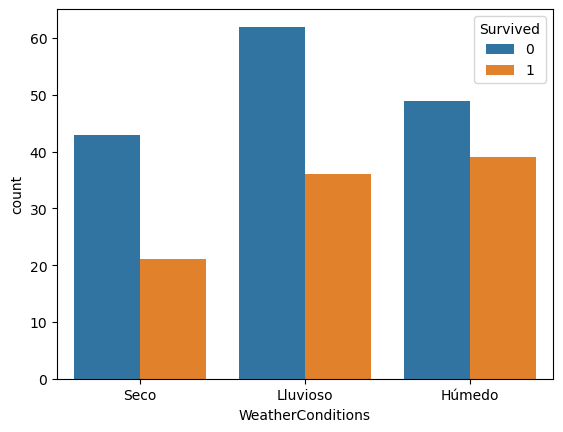

In [48]:
sns.countplot(data=df, x='WeatherConditions',hue='Survived')

#### By looking at the data, We remove irrelevant data
So we remove Age , CraftableItem

In [53]:
df = df.drop(columns=['Age','CraftableItem'])
df.head()

,Gender,Faction,CombatExp,StealthSkill,Health,Firearm,MeleeWeapon,ZoneInfectionLevel,WeatherConditions,StressLevel,HasCompanion,Survived
0,Masculino,Militar,9,3,74,Bow,Lead Pipe,4,Seco,5,0,1
1,Femenino,Civil,9,2,82,El Diablo,Ninguna,10,Lluvioso,8,0,0
2,Femenino,Civil,4,5,66,Shorty,Ninguna,4,Lluvioso,10,0,0
3,Femenino,Civil,3,6,98,Shotgun,Lead Pipe,8,Seco,1,1,0
4,Masculino,Militar,2,5,52,Revolver,Hatchet,10,Seco,0,0,0


## Data Split

In [54]:
from sklearn.model_selection import train_test_split

In [56]:
train , test = train_test_split(df, test_size=0.2)
train.shape

(200, 12)

In [57]:
test.shape

(50, 12)

## Preprocessing 

In [59]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 168 to 25
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Gender              200 non-null    object
 1   Faction             200 non-null    object
 2   CombatExp           200 non-null    int64 
 3   StealthSkill        200 non-null    int64 
 4   Health              200 non-null    int64 
 5   Firearm             200 non-null    object
 6   MeleeWeapon         200 non-null    object
 7   ZoneInfectionLevel  200 non-null    int64 
 8   WeatherConditions   200 non-null    object
 9   StressLevel         200 non-null    int64 
 10  HasCompanion        200 non-null    int64 
 11  Survived            200 non-null    int64 
dtypes: int64(7), object(5)
memory usage: 20.3+ KB


In [98]:
from sklearn.preprocessing import LabelEncoder , StandardScaler

In [105]:
train.head()

,Gender,Faction,CombatExp,StealthSkill,Health,Firearm,MeleeWeapon,ZoneInfectionLevel,WeatherConditions,StressLevel,HasCompanion,Survived
168,Masculino,Cazador,10,7,57,El Diablo,Baseball Bat,2,Seco,6,0,1
22,Masculino,Militar,6,6,89,Bow,Ninguna,4,Húmedo,8,0,0
201,Masculino,Militar,1,6,47,El Diablo,Lead Pipe,5,Húmedo,0,1,0
117,Femenino,Cazador,6,5,42,Bow,Switchblade,9,Lluvioso,1,1,0
60,Masculino,Cazador,5,9,63,Revolver,2x4,7,Lluvioso,3,1,0


In [99]:
le =LabelEncoder()
stdsc = StandardScaler()

In [151]:
train_X = train.drop(columns=['Survived'])
train_y = train['Survived']

test_X = test.drop(columns=['Survived'])
test_y = test['Survived']

In [152]:
train_X.head()

,Gender,Faction,CombatExp,StealthSkill,Health,Firearm,MeleeWeapon,ZoneInfectionLevel,WeatherConditions,StressLevel,HasCompanion
168,Masculino,Cazador,10,7,57,El Diablo,Baseball Bat,2,Seco,6,0
22,Masculino,Militar,6,6,89,Bow,Ninguna,4,Húmedo,8,0
201,Masculino,Militar,1,6,47,El Diablo,Lead Pipe,5,Húmedo,0,1
117,Femenino,Cazador,6,5,42,Bow,Switchblade,9,Lluvioso,1,1
60,Masculino,Cazador,5,9,63,Revolver,2x4,7,Lluvioso,3,1


In [153]:
cat_vars = ['Gender','Faction','Firearm','MeleeWeapon','WeatherConditions']
num_vars = ['Health']

In [154]:
for item in cat_vars:
    train_X[item] = le.fit_transform(train_X[item])
    test_X[item] = le.transform(test_X[item])

In [112]:
train_X.head()

,Gender,Faction,CombatExp,StealthSkill,Health,Firearm,MeleeWeapon,ZoneInfectionLevel,WeatherConditions,StressLevel,HasCompanion
168,1,0,10,7,57,2,1,2,2,6,0
22,1,4,6,6,89,1,5,4,0,8,0
201,1,4,1,6,47,2,3,5,0,0,1
117,0,0,6,5,42,1,6,9,1,1,1
60,1,0,5,9,63,6,0,7,1,3,1


In [155]:
train_X[num_vars] = stdsc.fit_transform(train_X[num_vars])
test_X[num_vars] = stdsc.transform(test_X[num_vars])
train_X.head()

,Gender,Faction,CombatExp,StealthSkill,Health,Firearm,MeleeWeapon,ZoneInfectionLevel,WeatherConditions,StressLevel,HasCompanion
168,1,0,10,7,-0.262359,2,1,2,2,6,0
22,1,4,6,6,1.188893,1,5,4,0,8,0
201,1,4,1,6,-0.715876,2,3,5,0,0,1
117,0,0,6,5,-0.942634,1,6,9,1,1,1
60,1,0,5,9,0.009751,6,0,7,1,3,1


## KFold Cross Validation

In [141]:
from sklearn.model_selection import KFold , cross_val_score , GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [117]:
kf = KFold(shuffle=True, random_state=42)

In [131]:
def kfold_val(model,X,y,cv):
    scores = cross_val_score(
        estimator = model,
        X = X,
        y = y,
        scoring = 'f1',
        cv = cv

    )
    print(f'Accuracy Scores : {scores}')
    print(f'\nAvg of scores : {scores.mean()}')

In [132]:
kfold_val(LogisticRegression() , train_X, train_y, kf)

Accuracy Scores : [0.90909091 0.88235294 1.         0.90322581 0.88      ]

Avg of scores : 0.9149339313437986


In [133]:
kfold_val(SVC() , train_X, train_y, kf)

Accuracy Scores : [0.85714286 0.8        0.94736842 0.89655172 0.96      ]

Avg of scores : 0.8922126004666839


In [135]:
kfold_val(RandomForestClassifier() , train_X, train_y, kf)

Accuracy Scores : [0.88235294 0.83870968 0.97297297 0.89655172 0.84615385]

Avg of scores : 0.8873482323721152


In [136]:
kfold_val(XGBClassifier() , train_X, train_y, kf)

Accuracy Scores : [0.85714286 0.90322581 0.97297297 0.9375     0.84615385]

Avg of scores : 0.9033990965442579


### Logistic Regression Looks best...
## HyperParameter Tuning

In [139]:
model = LogisticRegression(random_state=42, n_jobs=-1)

In [140]:
grid_param = {
    'C': [0.01,0.1,0.5,1],
    'penalty': ['l1','l2'],
    'max_iter': [50,100,200],
    'l1_ratio': [0.1,0.3,0.7,0.9]
}

In [142]:
gc = GridSearchCV(
    estimator = model,
    param_grid = grid_param,
    scoring = 'f1',
    n_jobs =-1,
    cv = kf
)

In [143]:
gc.fit(train_X, train_y)

D:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
240 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\Anaconda\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1218, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual

,estimator,LogisticRegre...ndom_state=42)
,param_grid,"{'C': [0.01, 0.1, ...], 'l1_ratio': [0.1, 0.3, ...], 'max_iter': [50, 100, ...], 'penalty': ['l1', 'l2']}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,KFold(n_split... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


## Final Model

In [148]:
best_model = gc.best_estimator_
best_model

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,50
,multi_class,'deprecated'


## Evaluation

In [157]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [156]:
y_pred = best_model.predict(test_X)
y_pred

array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0])

In [158]:
rep = classification_report( test_y, y_pred)
acc = accuracy_score( test_y, y_pred)
cm = confusion_matrix( test_y, y_pred)

Accuracy Score : 0.9

Classification Report : 
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        32
           1       0.93      0.78      0.85        18

    accuracy                           0.90        50
   macro avg       0.91      0.87      0.89        50
weighted avg       0.90      0.90      0.90        50

Confusion Matrix : 
[[31  1]
 [ 4 14]]


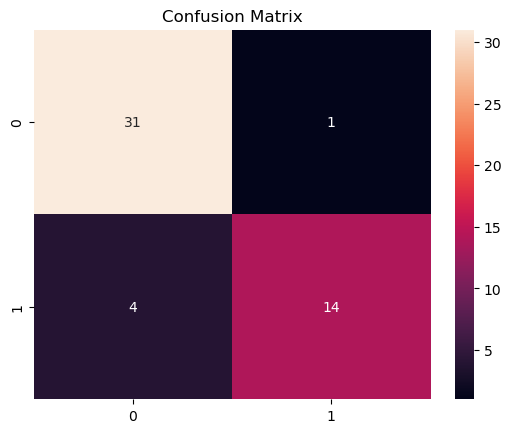

In [159]:
print(f'Accuracy Score : {acc}\n')
print(f'Classification Report : \n{rep}')
print(f'Confusion Matrix : \n{cm}')

sns.heatmap(data=cm, annot=True)
plt.title('Confusion Matrix')
plt.show()